In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

Using TensorFlow backend.


### 建立卷积神经网络模型

In [2]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [3]:
model.add(MaxPool2D(pool_size=(2,2)))

In [4]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [5]:
model.add(MaxPool2D(pool_size=(2,2)))

In [6]:
model.add(Dropout(0.25))

In [7]:
model.add(Flatten())

In [8]:
model.add(Dense(128,activation='relu'))

In [9]:
model.add(Dropout(0.5))

In [10]:
model.add(Dense(10,activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

### 数据预处理

In [13]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [14]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [15]:
x_Train4D = x_train_image.reshape(60000,28,28,1).astype('float32')
x_Test4D = x_test_image.reshape(10000,28,28,1).astype('float32')

In [17]:
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [18]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

### 训练模型

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
train_history = model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 109s - loss: 0.4830 - acc: 0.8482 - val_loss: 0.0922 - val_acc: 0.9740
Epoch 2/10
 - 106s - loss: 0.1289 - acc: 0.9613 - val_loss: 0.0613 - val_acc: 0.9809
Epoch 3/10
 - 100s - loss: 0.0940 - acc: 0.9717 - val_loss: 0.0477 - val_acc: 0.9848
Epoch 4/10
 - 99s - loss: 0.0765 - acc: 0.9769 - val_loss: 0.0444 - val_acc: 0.9871
Epoch 5/10
 - 90s - loss: 0.0647 - acc: 0.9805 - val_loss: 0.0414 - val_acc: 0.9885
Epoch 6/10
 - 89s - loss: 0.0595 - acc: 0.9821 - val_loss: 0.0366 - val_acc: 0.9893
Epoch 7/10
 - 91s - loss: 0.0517 - acc: 0.9837 - val_loss: 0.0357 - val_acc: 0.9902
Epoch 8/10
 - 90s - loss: 0.0463 - acc: 0.9863 - val_loss: 0.0313 - val_acc: 0.9913
Epoch 9/10
 - 97s - loss: 0.0432 - acc: 0.9863 - val_loss: 0.0353 - val_acc: 0.9902
Epoch 10/10
 - 98s - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0331 - val_acc: 0.9897


### 画图

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

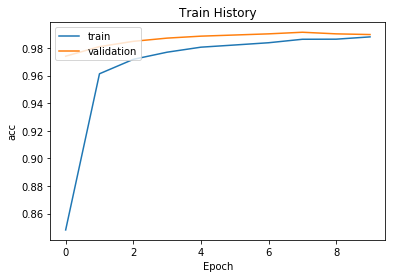

In [22]:
show_train_history(train_history,'acc','val_acc')

### 评估模型准确率

In [23]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 7s 728us/step

loss= 0.026673919360532455
accuracy= 0.9913


In [25]:
prediction = model.predict_classes(x_Test4D)

### 显示稀疏矩阵

In [26]:
import pandas as pd

In [27]:
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1131,1,1,0,1,0,1,0,0
2,1,2,1024,0,1,0,0,4,0,0
3,0,0,1,1004,0,2,0,2,1,0
4,0,0,0,0,976,0,0,1,0,5
5,1,0,0,4,0,886,1,0,0,0
6,4,2,1,0,1,5,945,0,0,0
7,0,2,3,0,0,0,0,1021,1,1
8,2,1,2,3,0,1,0,2,960,3
